In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Stock Price dataset.csv")
df = pd.DataFrame(data)

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-11-18,27.896016,30.654965,24.523970,26.976368,62546380,0.0,0.0
1,1999-11-19,26.324950,26.363270,24.409017,24.753885,15234146,0.0,0.0
2,1999-11-22,25.328663,26.976368,24.562289,26.976368,6577870,0.0,0.0
3,1999-11-23,26.056724,26.746461,24.523975,24.523975,5975611,0.0,0.0
4,1999-11-24,24.600619,25.711862,24.523981,25.175400,4843231,0.0,0.0
...,...,...,...,...,...,...,...,...
5692,2022-07-06,120.800003,122.339996,120.559998,121.180000,1642300,0.0,0.0
5693,2022-07-07,120.989998,123.220001,120.620003,123.150002,1221200,0.0,0.0
5694,2022-07-08,120.959999,123.209999,120.959999,122.510002,1267300,0.0,0.0
5695,2022-07-11,121.610001,123.459999,121.010002,123.120003,1304400,0.0,0.0


In [ ]:
df.shape

(5697, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5697 non-null   object 
 1   Open          5697 non-null   float64
 2   High          5697 non-null   float64
 3   Low           5697 non-null   float64
 4   Close         5697 non-null   float64
 5   Volume        5697 non-null   int64  
 6   Dividends     5697 non-null   float64
 7   Stock Splits  5697 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 356.2+ KB


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
close = df.reset_index()['Close']
close.head()

,Close
0,26.976368
1,24.753885
2,26.976368
3,24.523975
4,25.175400


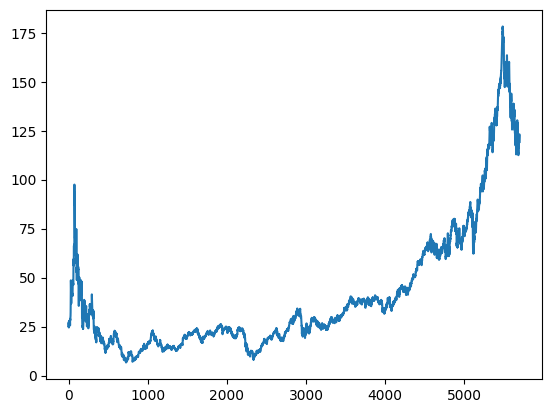

In [ ]:
plt.plot(close)
plt.show()

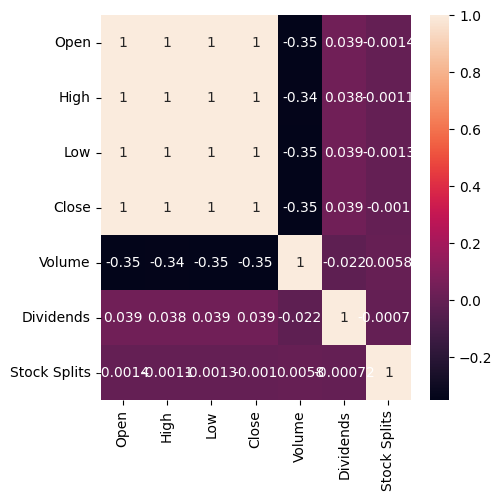

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

cormap = numerical_df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)
plt.show()

In [ ]:
def get_corelated_columns(cor_dat, threshold):
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [ ]:
top_corelated_values = get_corelated_columns(cormap['Close'], 0.60)
top_corelated_values

,corr value
Open,0.999565
High,0.999779
Low,0.999754
Close,1.000000


In [ ]:

X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

df['Date'] = pd.to_datetime(df['Date'])
X['year'] = df['Date'].dt.year
X['month'] = df['Date'].dt.month
X['day'] = df['Date'].dt.day

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Volume,Dividends,Stock Splits,year,month,day
0,0.124287,0.138803,0.106585,1.000000,0.0,0.0,0.0,0.909091,0.566667
1,0.115136,0.113807,0.105907,0.240263,0.0,0.0,0.0,0.909091,0.600000
2,0.109332,0.117378,0.106811,0.101261,0.0,0.0,0.0,0.909091,0.700000
3,0.113573,0.116039,0.106585,0.091590,0.0,0.0,0.0,0.909091,0.733333
4,0.105091,0.110013,0.106585,0.073406,0.0,0.0,0.0,0.909091,0.766667


In [ ]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
from sklearn.linear_model import LinearRegression



model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:

y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
4557,64.696442,64.750738
4558,65.305016,65.380090
4559,66.966637,66.769234
4560,66.464294,66.770412
4561,67.526962,67.435425


In [ ]:


from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9995106669366357


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred_1)
mse = mean_squared_error(y_test, y_pred_1)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_1)


print("Accuracy (R-squared) score: {0}".format(r2_score(y_test, y_pred_1)))
print("Mean Absolute Error (MAE): {0}".format(mae))
print("Mean Squared Error (MSE): {0}".format(mse))
print("Root Mean Squared Error (RMSE): {0}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {0}".format(mape))


Accuracy (R-squared) score: 0.9995106669366357
Mean Absolute Error (MAE): 0.5093928980809104
Mean Squared Error (MSE): 0.5269612465269554
Root Mean Squared Error (RMSE): 0.72592096438039
Mean Absolute Percentage Error (MAPE): 0.00511787409333475


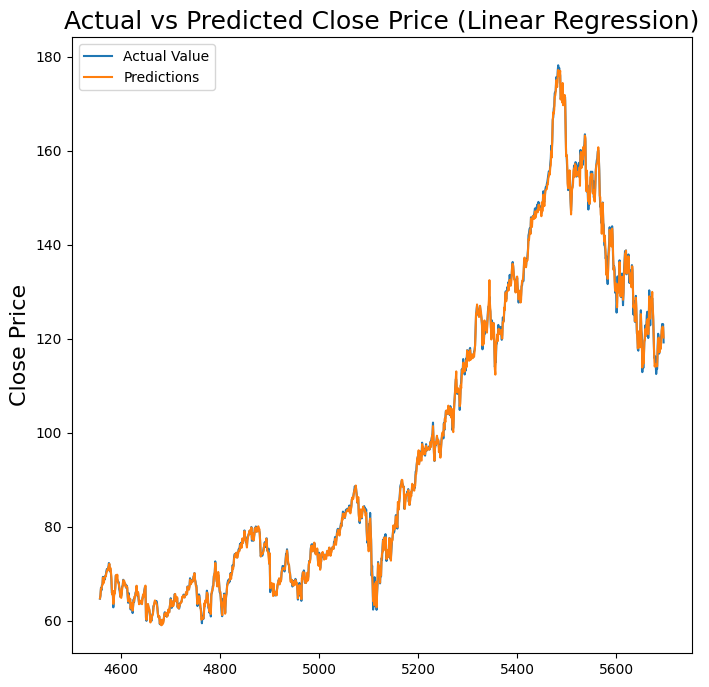

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.title('Actual vs Predicted Close Price (Linear Regression)', fontsize=18)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


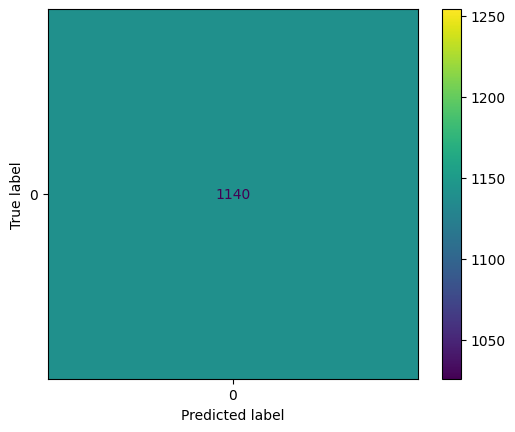

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

threshold = 0.5
y_pred_class = (y_pred_1 > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_ridge = Ridge(alpha=1.0)



In [ ]:
model_ridge.fit(X_train, y_train)


y_pred_ridge = model_ridge.predict(X_test)


In [ ]:

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

print(f"R-squared: {r2_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge}%")

R-squared: 0.9976834356784127
Mean Absolute Error (MAE): 1.231060052397
Mean Squared Error (MSE): 2.4947008774975346
Root Mean Squared Error (RMSE): 1.579462211481343
Mean Absolute Percentage Error (MAPE): 1.1990245353147315%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


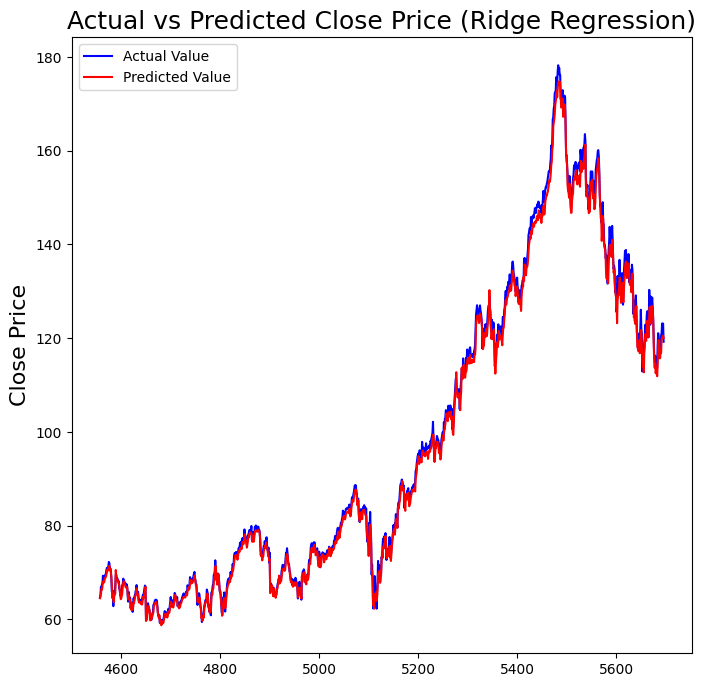

In [ ]:

pred_df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})

plt.figure(figsize=(8, 8))
plt.plot(pred_df_ridge['Actual'], label='Actual Value', color='blue')
plt.plot(pred_df_ridge['Predicted'], label='Predicted Value', color='red')
plt.ylabel('Close Price', fontsize=16)
plt.title('Actual vs Predicted Close Price (Ridge Regression)', fontsize=18)
plt.legend()
plt.show()
